In [ ]:
import tensorflow as tf
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from keras.layers import Dense, BatchNormalization
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler



cust_df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
cust_df.shape

(10000, 14)

In [ ]:
cust_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
cust_df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
cust_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
cust_df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
cust_df.isnull().values.any()

np.False_

In [ ]:
cust_df=cust_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
cust_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
cust_df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
cust_df.shape

(10000, 11)

In [ ]:
# Select only numeric columns for the correlation calculation
numeric_df = cust_df.select_dtypes(include=['int64', 'float64'])

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

In [ ]:
# Display the correlation matrix
print(correlation_matrix)

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure       

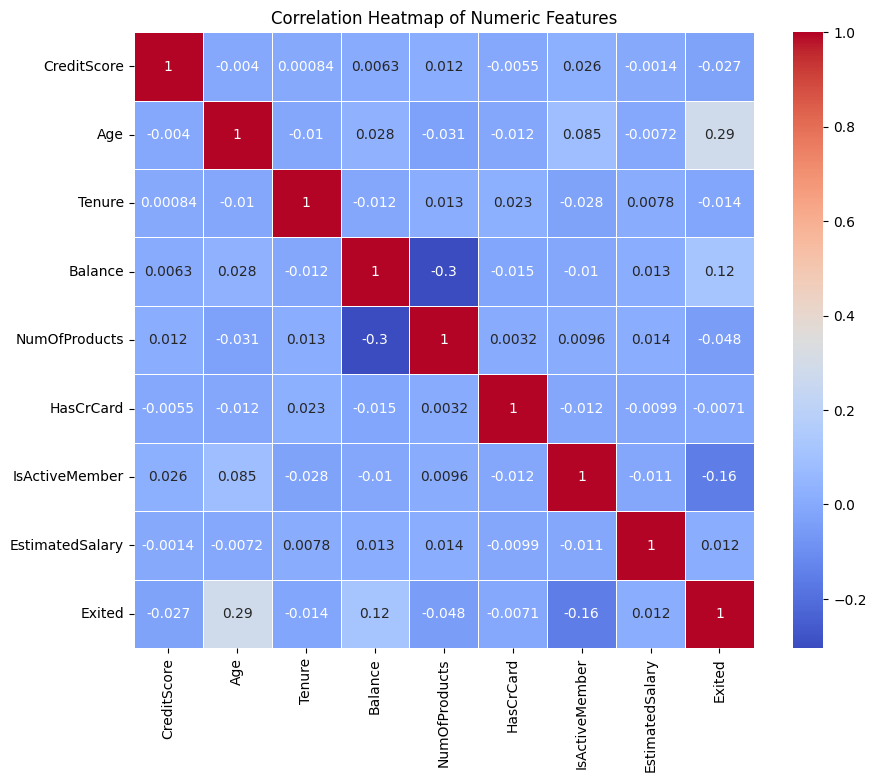

In [ ]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

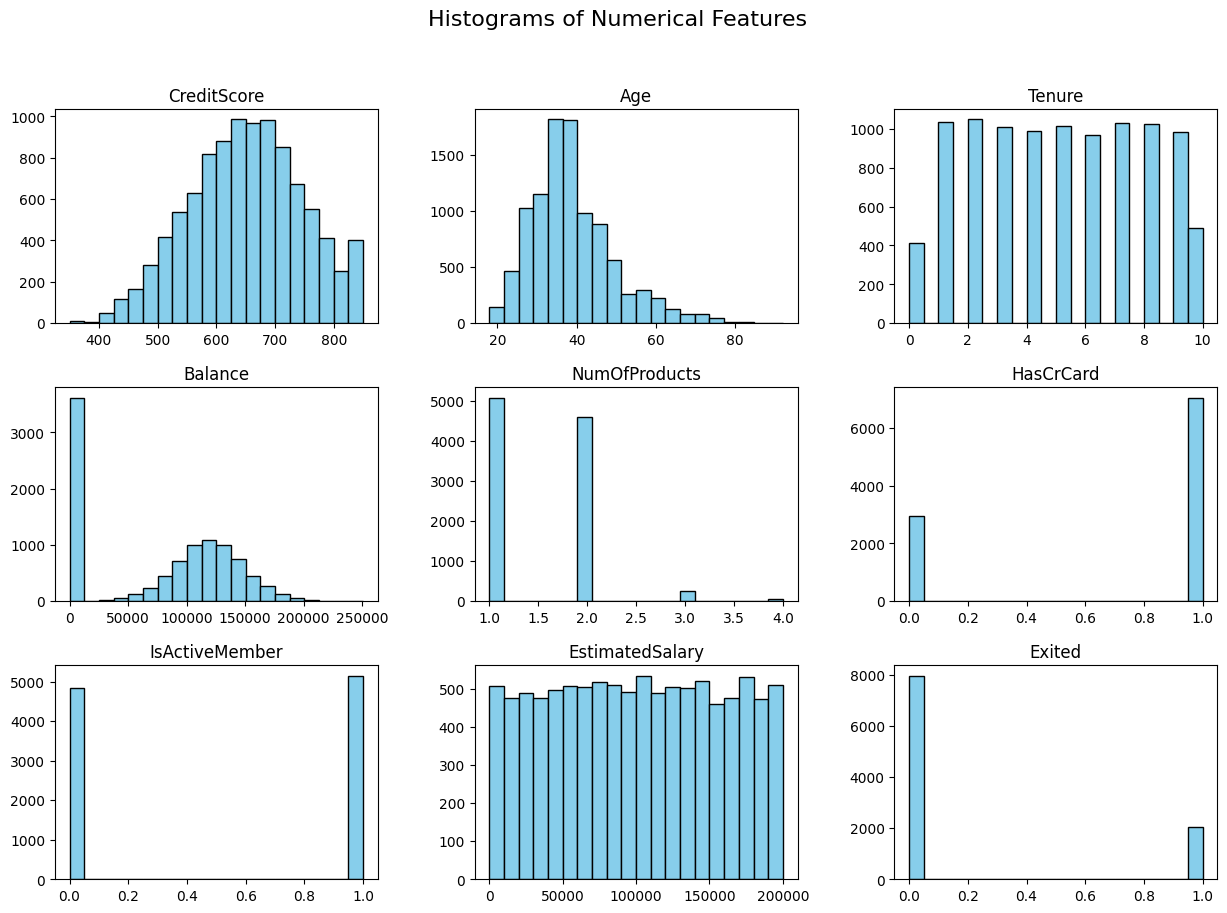

In [ ]:
# Generate histograms for numerical columns
numerical_columns = cust_df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
cust_df[numerical_columns].hist(bins=20, figsize=(15, 10), grid=False, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

In [ ]:
# Set plot style for better aesthetics
sns.set(style="whitegrid")

In [ ]:
# List of categorical columns in your dataset
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

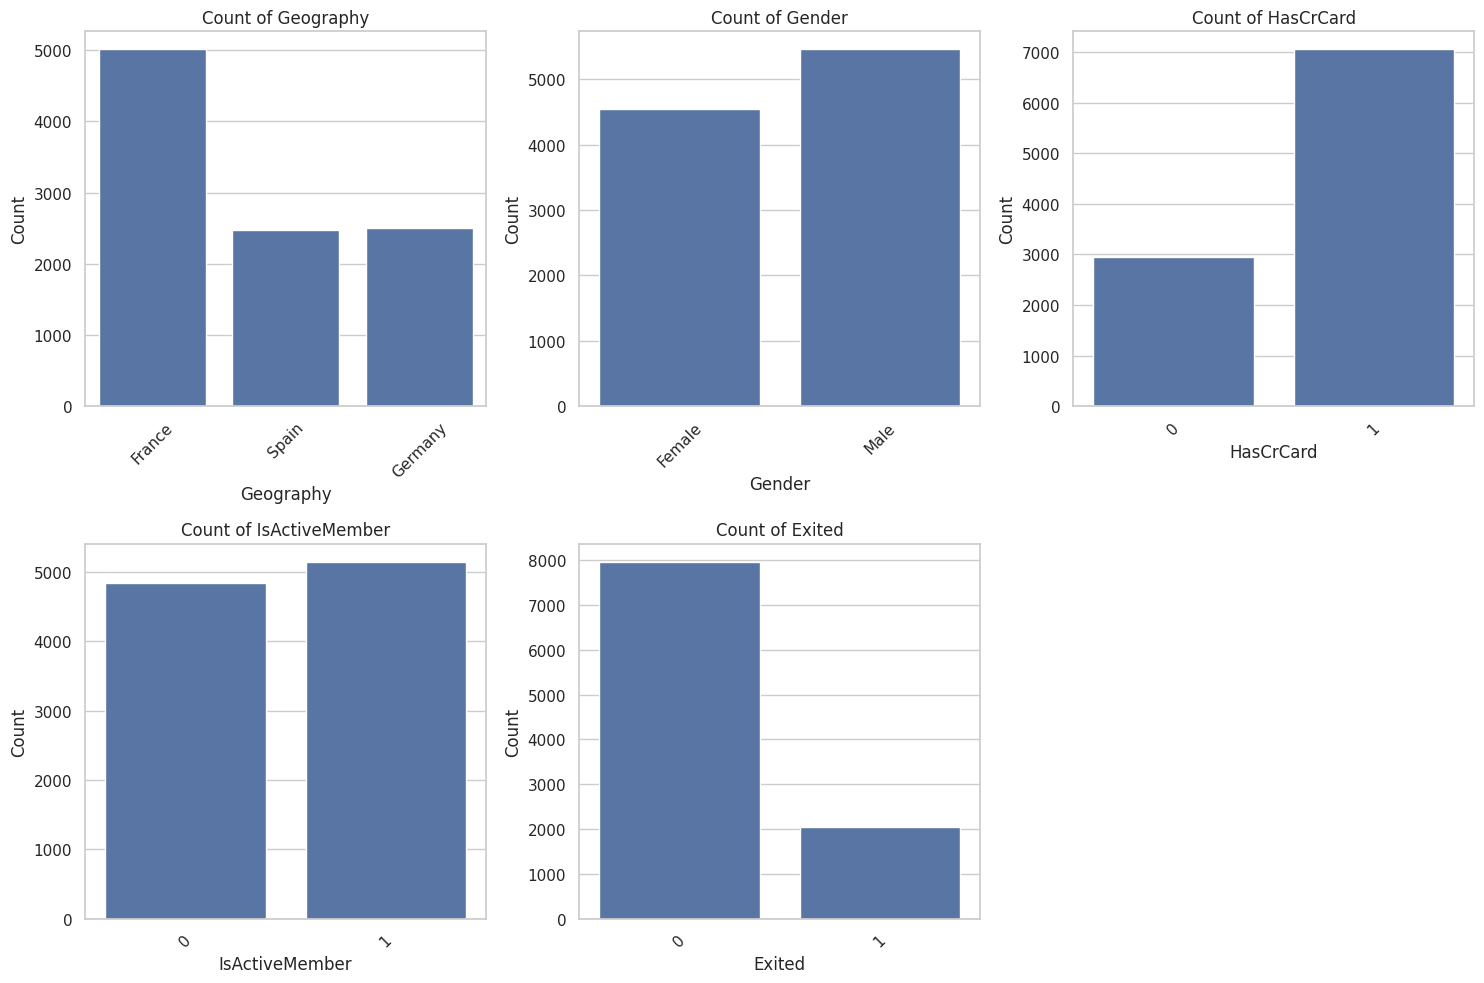

In [ ]:
# Plot bar charts for each categorical variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots
    sns.countplot(data=cust_df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Count the occurrences of Gender status (0: Female, 1: Male)
gender_counts = cust_df['Gender'].value_counts()

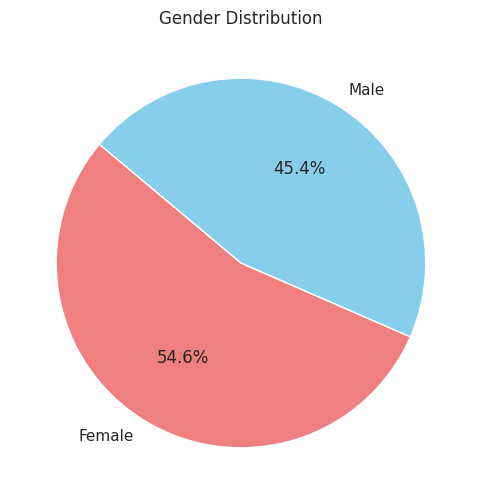

In [ ]:
# Plotting the pie chart for Travel Insurance distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'])
plt.title('Gender Distribution')
plt.show()

In [ ]:
# Count the occurrences of Gender status (0: France, 1: Spain, 2: Germany)
country_counts = cust_df['Geography'].value_counts()

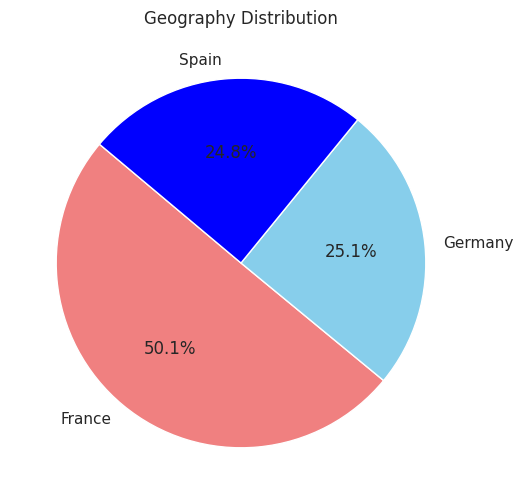

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue', 'blue'])
plt.title('Geography Distribution')
plt.show()

In [ ]:
# Count the occurrences of Gender status (0: Not Exited, 1: Exited)
Exited_counts = cust_df['Exited'].value_counts()

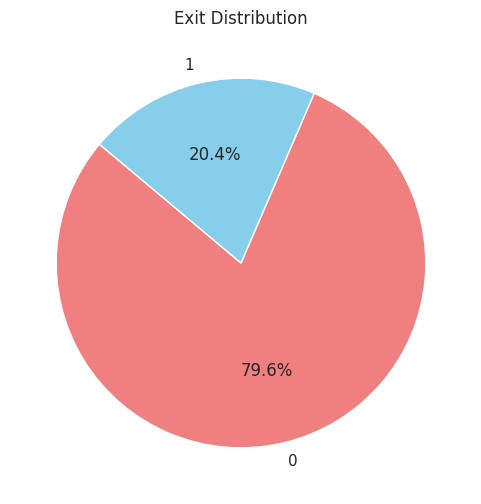

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(Exited_counts, labels=Exited_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'])
plt.title('Exit Distribution')
plt.show()

In [ ]:
# Encoding categorical variables
le = LabelEncoder()
cust_df['Gender'] = LabelEncoder().fit_transform(cust_df['Gender'])

In [ ]:
#Encoding the Geographical feature through the One hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_geography = encoder.fit_transform(cust_df[['Geography']])

In [ ]:
# Convert encoded features into DataFrame
encoded_df = pd.DataFrame(encoded_geography, columns=encoder.get_feature_names_out(['Geography']))

In [ ]:
# Merge with the original DataFrame (excluding original categorical column)
cust_df_encoded = pd.concat([cust_df.drop('Geography', axis=1), encoded_df], axis=1)
print("\nAfter One-Hot Encoding:")
print(cust_df_encoded)


After One-Hot Encoding:
      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       0   42       2       0.00              1          1   
1             608       0   41       1   83807.86              1          0   
2             502       0   42       8  159660.80              3          1   
3             699       0   39       1       0.00              2          0   
4             850       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       1   39       5       0.00              2          1   
9996          516       1   35      10   57369.61              1          1   
9997          709       0   36       7       0.00              1          0   
9998          772       1   42       3   75075.31              2          1   
9999          792       0   28       4  130142.79              1          1   

      IsActiveMember  Esti

In [ ]:
cust_df_encoded=cust_df_encoded.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)

KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

In [ ]:
# Encoding categorical variables
le = LabelEncoder()
cust_df_encoded['Gender'] = LabelEncoder().fit_transform(cust_df['Gender'])

In [ ]:
X = cust_df_encoded.drop('Exited', axis=1)
y = cust_df_encoded['Exited']
print(cust_df_encoded)

      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       0   42       2       0.00              1          1   
1             608       0   41       1   83807.86              1          0   
2             502       0   42       8  159660.80              3          1   
3             699       0   39       1       0.00              2          0   
4             850       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       1   39       5       0.00              2          1   
9996          516       1   35      10   57369.61              1          1   
9997          709       0   36       7       0.00              1          0   
9998          772       1   42       3   75075.31              2          1   
9999          792       0   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geog

In [ ]:
#Normalizing the Dataset
scaler = MinMaxScaler()

In [ ]:
X[['CreditScore','Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(X[['CreditScore','Age', 'Balance', 'EstimatedSalary']])

In [ ]:
#Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Builing the Model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
#This is the Batch normalization layer
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6210 - loss: 0.6633 - val_accuracy: 0.8155 - val_loss: 0.4728
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8079 - loss: 0.4569 - val_accuracy: 0.8335 - val_loss: 0.3875
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8176 - loss: 0.4094 - val_accuracy: 0.8385 - val_loss: 0.3793
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8333 - loss: 0.3927 - val_accuracy: 0.8465 - val_loss: 0.3745
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8301 - loss: 0.3873 - val_accuracy: 0.8475 - val_loss: 0.3738
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8416 - loss: 0.3764 - val_accuracy: 0.8530 - val_loss: 0.3620
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8393 - loss: 0.3766 - val_accuracy: 0.8535 - val_loss: 0.3582
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8479 - loss: 0.3682 - val_accuracy: 0.

In [ ]:
#Test Accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8657 - loss: 0.3387
Test Accuracy: 86.25%


In [ ]:
#Test Kappa score
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Kappa score: {accuracy*100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8657 - loss: 0.3387
Test Kappa score: 86.25%


In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


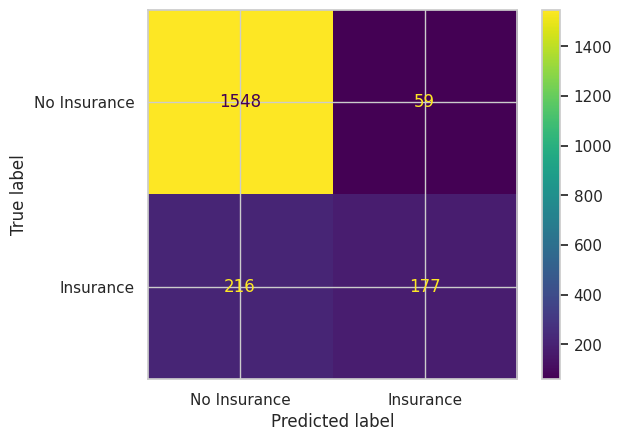

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Insurance", "Insurance"]).plot();

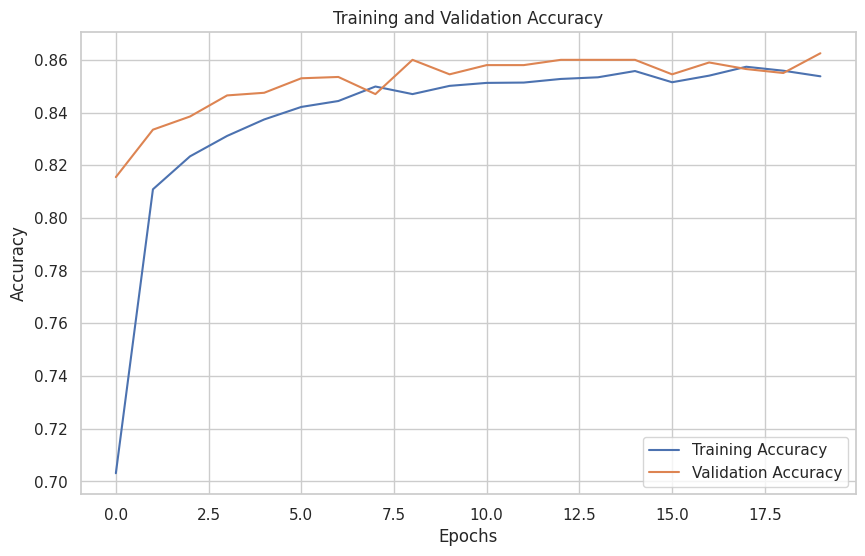

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\
Model Accuracy:", accuracy)

Model Accuracy: 0.8625


In [ ]:
# Print classification report
from sklearn.metrics import classification_report
print("\
Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



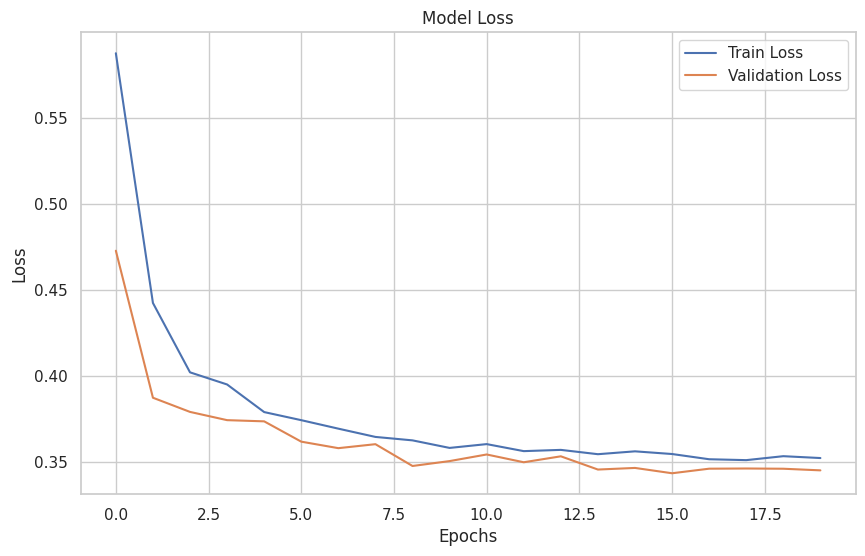

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Exited_counts = cust_df_encoded['Exited'].value_counts()

In [ ]:
print("Exited_counts:")

Exited_counts:


In [ ]:
print(Exited_counts)

Exited
0    7963
1    2037
Name: count, dtype: int64


In [ ]:
kappa = cohen_kappa_score(y_test, y_pred)

print("Kappa: %.2f" %kappa)

Kappa: 0.49


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, cohen_kappa_score

In [ ]:
accuracy_ANN = accuracy_score(y_test, y_pred)
F1_ANN = f1_score(y_test, y_pred)
recall_ANN = recall_score(y_test, y_pred)
precision_ANN = precision_score(y_test, y_pred)
kappa_value_ANN = cohen_kappa_score(y_test, y_pred)

# Displaying metrics
print("\nModel Performance Metrics:")
print(f"Accuracy Score: {accuracy_ANN * 100:.2f}%")
print(f"F1 Score: {F1_ANN:.4f}")
print(f"Recall: {recall_ANN:.4f}")
print(f"Precision: {precision_ANN:.4f}")
print(f"Cohen's Kappa: {kappa_value_ANN:.4f}")


Model Performance Metrics:
Accuracy Score: 86.25%
F1 Score: 0.5628
Recall: 0.4504
Precision: 0.7500
Cohen's Kappa: 0.4872


In [ ]:
cust_df_encoded.head
# Apply SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
Exited_counts = cust_df_encoded['Exited'].value_counts()

In [ ]:
print("Exited_counts:")

Exited_counts:


In [ ]:
print(Exited_counts)

Exited
0    7963
1    2037
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train)

915      0
2987     1
3666     0
6336     0
14282    1
        ..
5952     1
9263     0
3046     1
11684    1
4321     0
Name: Exited, Length: 12740, dtype: int64


In [ ]:
Exited_counts = y_train.value_counts()

In [ ]:
print("Exited_counts:")

Exited_counts:


In [ ]:
print(Exited_counts)

Exited
0    6370
1    6370
Name: count, dtype: int64


In [ ]:
#Builing the Model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
#This is the Batch normalization layer
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6051 - loss: 0.6767 - val_accuracy: 0.6890 - val_loss: 0.5809
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7355 - loss: 0.5335 - val_accuracy: 0.7564 - val_loss: 0.4915
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7544 - loss: 0.4963 - val_accuracy: 0.7756 - val_loss: 0.4655
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7786 - loss: 0.4731 - val_accuracy: 0.7828 - val_loss: 0.4516
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7777 - loss: 0.4715 - val_accuracy: 0.7916 - val_loss: 0.4421
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7839 - loss: 0.4544 - val_accuracy: 0.7834 - val_loss: 0.4477
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7912 - loss: 0.4474 - val_accuracy: 0.7897 - val_loss: 0.4448
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7971 - loss: 0.4449 - val_accuracy: 0.

In [ ]:
#Test Accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8046 - loss: 0.4240
Test Accuracy: 80.45%


In [ ]:
#Test Kappa score
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Kappa score: {accuracy*100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.4240
Test Kappa score: 80.45%


In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


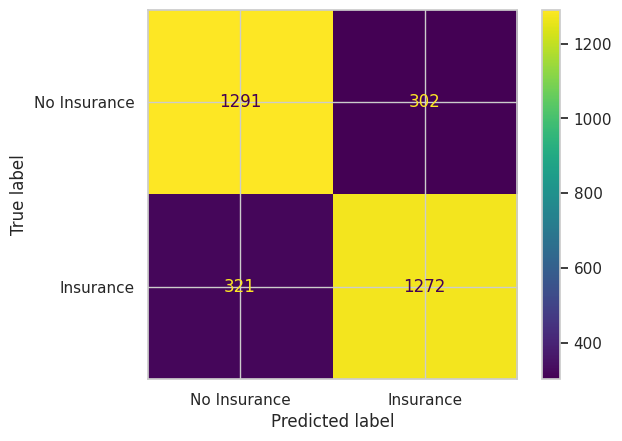

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Insurance", "Insurance"]).plot();

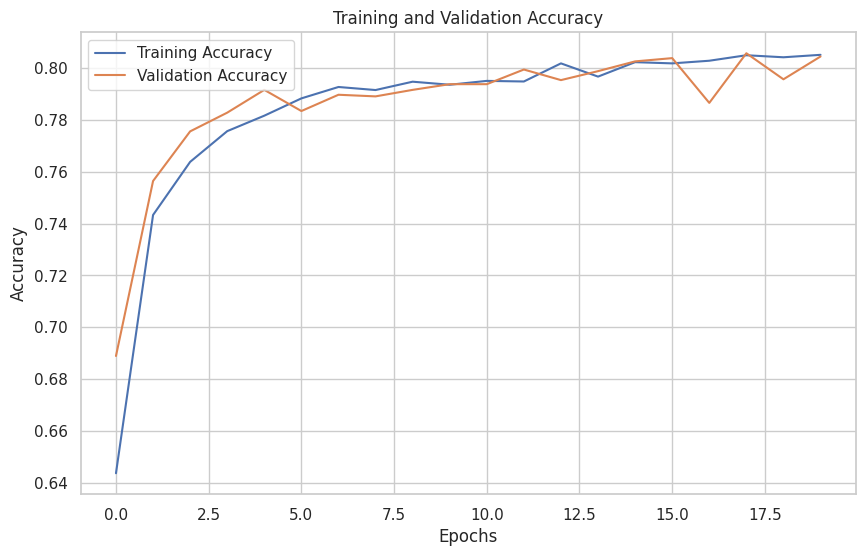

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\
Model Accuracy:", accuracy)

Model Accuracy: 0.8044569993722536


In [ ]:
# Print classification report
from sklearn.metrics import classification_report
print("\
Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1593
           1       0.81      0.80      0.80      1593

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



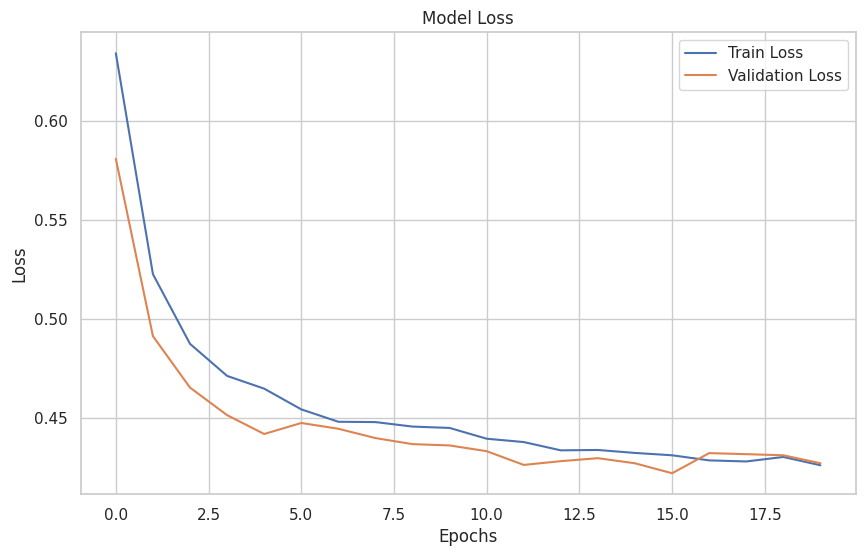

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
kappa = cohen_kappa_score(y_test, y_pred)

print("Kappa: %.2f" %kappa)

Kappa: 0.61


In [ ]:
accuracy_ANN = accuracy_score(y_test, y_pred)
F1_ANN = f1_score(y_test, y_pred)
recall_ANN = recall_score(y_test, y_pred)
precision_ANN = precision_score(y_test, y_pred)
kappa_value_ANN = cohen_kappa_score(y_test, y_pred)

# Displaying metrics
print("\nModel Performance Metrics:")
print(f"Accuracy Score: {accuracy_ANN * 100:.2f}%")
print(f"F1 Score: {F1_ANN:.4f}")
print(f"Recall: {recall_ANN:.4f}")
print(f"Precision: {precision_ANN:.4f}")
print(f"Cohen's Kappa: {kappa_value_ANN:.4f}")


Model Performance Metrics:
Accuracy Score: 80.45%
F1 Score: 0.8033
Recall: 0.7985
Precision: 0.8081
Cohen's Kappa: 0.6089


In [ ]:
#Builing the Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
#This is the Batch normalization layer
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
Exited_counts = y_train.value_counts()

In [ ]:
print("Exited counts:")

Exited counts:


In [ ]:
print(Exited_counts)

Exited
0    6370
1    6370
Name: count, dtype: int64


In [ ]:
#Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6554 - loss: 0.6323 - val_accuracy: 0.6623 - val_loss: 0.6018
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7633 - loss: 0.4816 - val_accuracy: 0.7505 - val_loss: 0.5071
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7793 - loss: 0.4551 - val_accuracy: 0.7897 - val_loss: 0.4431
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7877 - loss: 0.4518 - val_accuracy: 0.7919 - val_loss: 0.4463
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8010 - loss: 0.4299 - val_accuracy: 0.7994 - val_loss: 0.4309
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8073 - loss: 0.4240 - val_accuracy: 0.8004 - val_loss: 0.4259
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8065 - loss: 0.4262 - val_accuracy: 0.8023 - val_loss: 0.4337
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7976 - loss: 0.4321 - val_accuracy: 0.

In [ ]:
print(Exited_counts)

Exited
0    6370
1    6370
Name: count, dtype: int64


In [ ]:
#Test Accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8270 - loss: 0.4026
Test Accuracy: 82.64%


In [ ]:
#Test Kappa score
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Kappa score: {accuracy*100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8270 - loss: 0.4026
Test Kappa score: 82.64%


In [ ]:
# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


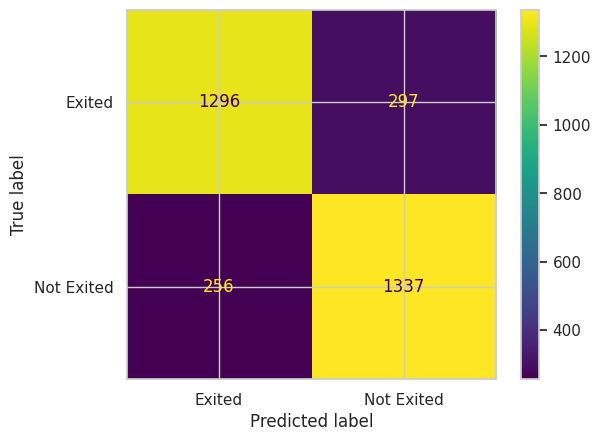

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Exited", "Not Exited"]).plot();

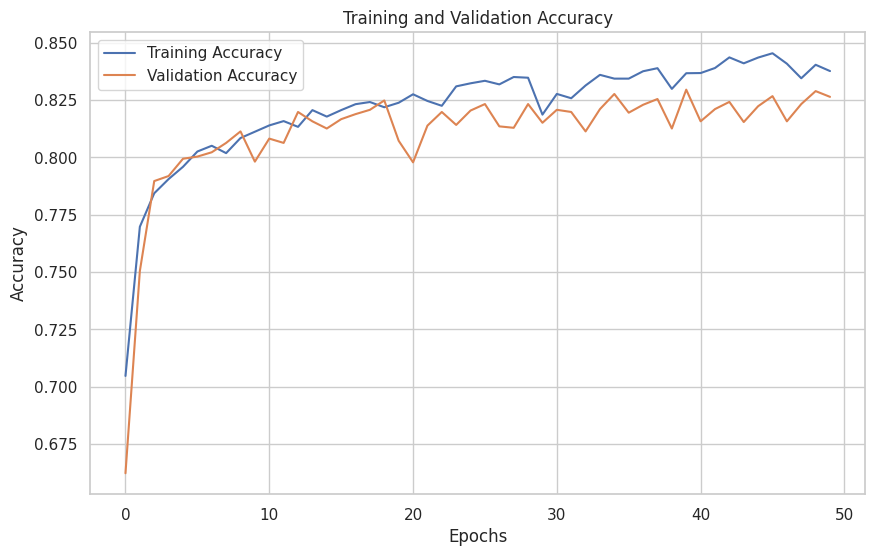

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install scikeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
def create_model(learning_rate=0.001, neurons1=64, neurons2=32, neurons3=16):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(neurons2, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(neurons3, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(1, activation='sigmoid'))

    # Optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)
# Workaround for scikit-learn versions >= 1.5.0 compatibility with scikeras
model._sklearn_version_for_tags = "1.4"

param_dist = {
    'learning_rate': [0.0001, 0.0005, 0.001, 0.005],
    'neurons1': [32, 64, 128],
    'neurons2': [16, 32, 64],
    'neurons3': [8, 16, 32],
    'batch_size': [16, 32, 64, 128],
    'epochs': [20, 50, 100]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,            # number of models to try
    cv=3,                 # 3-fold cross validation
    verbose=2,
    random_state=42,
    scoring='accuracy'    # Explicitly set the scoring parameter
)

random_search.fit(X_train_res, y_train_res) # Use resampled data for fitting

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
pip install scikeras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
def create_model(learning_rate=0.001, neurons1=64, neurons2=32, neurons3=16):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(neurons2, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(neurons3, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss="binary_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model


In [ ]:
model = KerasClassifier(
    model=create_model,
    verbose=0
)


In [ ]:
param_dist = {
    "model__learning_rate": [0.0001, 0.0005, 0.001, 0.005],
    "model__neurons1": [32, 64, 128],
    "model__neurons2": [16, 32, 64],
    "model__neurons3": [8, 16, 32],
    "batch_size": [16, 32, 64, 128],
    "epochs": [20, 50, 100]
}


In [ ]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_res, y_train_res)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [ ]:
def build_model(hp):
    model = Sequential()

    # Layer 1
    model.add(Dense(
        units=hp.Int("neurons1", 32, 128, step=32),
        activation="relu",
        input_dim=X_train.shape[1]
    ))
    model.add(BatchNormalization())

    # Layer 2
    model.add(Dense(
        units=hp.Int("neurons2", 16, 64, step=16),
        activation="relu"
    ))
    model.add(BatchNormalization())

    # Layer 3
    model.add(Dense(
        units=hp.Int("neurons3", 8, 32, step=8),
        activation="relu"
    ))
    model.add(BatchNormalization())

    model.add(Dense(1, activation="sigmoid"))

    # Learning Rate
    lr = hp.Choice("learning_rate", [0.0001, 0.0005, 0.001, 0.005])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=50,
    factor=3,
    directory="ann_tuning",
    project_name="ann_batchnorm"
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(
    X_train_res,
    y_train_res,
    epochs=50,
    validation_split=0.2
)


Trial 90 Complete [00h 01m 07s]
val_accuracy: 0.8379120826721191

Best val_accuracy So Far: 0.8504709601402283
Total elapsed time: 00h 26m 26s


In [ ]:
best_hp = tuner.get_best_hyperparameters(1)[0]

print("Best Hyperparameters:")
print(best_hp.values)


Best Hyperparameters:
{'neurons1': 96, 'neurons2': 64, 'neurons3': 32, 'learning_rate': 0.001, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0068'}


In [ ]:
final_model = tuner.hypermodel.build(best_hp)

history = final_model.fit(
    X_train_res,
    y_train_res,
    epochs=best_hp.get("tuner/epochs"),
    batch_size=32,        # or tune this too
    validation_split=0.2
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6598 - loss: 0.6257 - val_accuracy: 0.7708 - val_loss: 0.4884
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7606 - loss: 0.4941 - val_accuracy: 0.7849 - val_loss: 0.4507
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7792 - loss: 0.4666 - val_accuracy: 0.8073 - val_loss: 0.4280
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7884 - loss: 0.4536 - val_accuracy: 0.8097 - val_loss: 0.4150
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7994 - loss: 0.4361 - val_accuracy: 0.8073 - val_loss: 0.4082
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7986 - loss: 0.4337 - val_accuracy: 0.8159 - val_loss: 0.4195
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8069 - loss: 0.4251 - val_accuracy: 0.8034 - val_loss: 0.4263
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8051 - loss: 0.4230 - val_accuracy: 0.

In [ ]:
best_hp = tuner.get_best_hyperparameters(1)[0]

print("\n🔹 Best Hyperparameters Found:")
for param, val in best_hp.values.items():
    print(f"{param}: {val}")



🔹 Best Hyperparameters Found:
neurons1: 96
neurons2: 64
neurons3: 32
learning_rate: 0.001
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0068


In [ ]:
history = final_model.fit(
    X_train_res,
    y_train_res,
    epochs=best_hp.get("tuner/epochs"),
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8538 - loss: 0.3216 - val_accuracy: 0.8414 - val_loss: 0.3698
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8578 - loss: 0.3197 - val_accuracy: 0.8422 - val_loss: 0.3825
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8661 - loss: 0.3146 - val_accuracy: 0.8438 - val_loss: 0.3697
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8718 - loss: 0.3084 - val_accuracy: 0.8477 - val_loss: 0.3576
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8668 - loss: 0.3088 - val_accuracy: 0.8422 - val_loss: 0.3688
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8646 - loss: 0.3123 - val_accuracy: 0.8513 - val_loss: 0.3823
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8544 - loss: 0.3243 - val_accuracy: 0.8462 - val_loss: 0.3641
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8639 - loss: 0.3141 - val_accuracy: 0.

In [ ]:
print("\n🔹 Final Model Training Performance:")
print("Final Training Accuracy :", history.history['accuracy'][-1])
print("Final Training Loss     :", history.history['loss'][-1])
print("Validation Accuracy     :", history.history['val_accuracy'][-1])
print("Validation Loss         :", history.history['val_loss'][-1])



🔹 Final Model Training Performance:
Final Training Accuracy : 0.8817700147628784
Final Training Loss     : 0.2771419584751129
Validation Accuracy     : 0.84929358959198
Validation Loss         : 0.3723375201225281


In [ ]:
test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)

print("\n🔹 Test Set Performance:")
print("Test Accuracy:", test_acc)
print("Test Loss    :", test_loss)



🔹 Test Set Performance:
Test Accuracy: 0.8396108150482178
Test Loss    : 0.40351760387420654


In [ ]:
from sklearn.metrics import classification_report

y_pred = (final_model.predict(X_test) > 0.5).astype(int)

print("\n🔹 Detailed Classification Report:")
print(classification_report(y_test, y_pred))


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

🔹 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1593
           1       0.82      0.86      0.84      1593

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



In [ ]:
from sklearn.metrics import classification_report

y_pred = (final_model.predict(X_test) > 0.5).astype(int)

print("\n🔹 Detailed Classification Report:")
print(classification_report(y_test, y_pred))


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

🔹 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1593
           1       0.82      0.86      0.84      1593

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



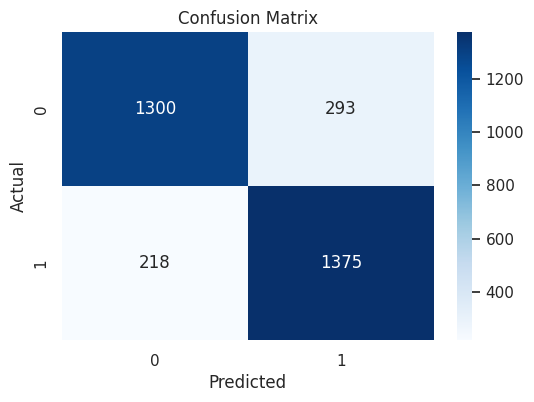

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



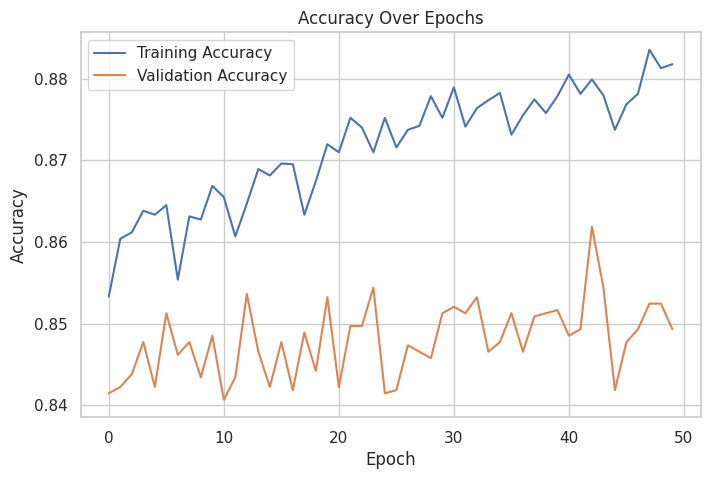

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


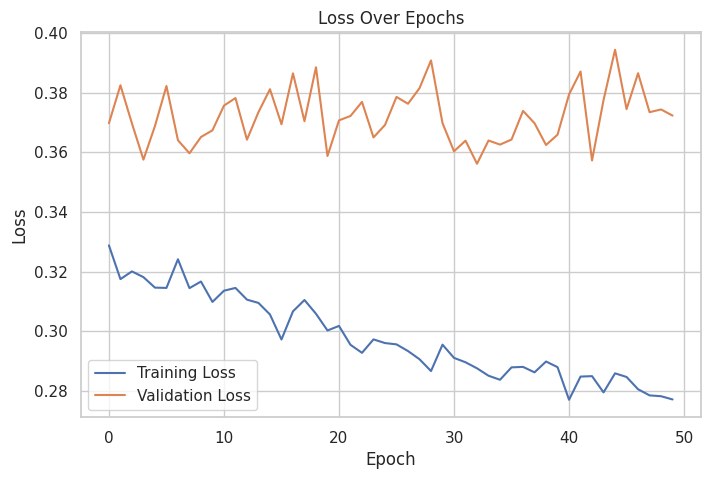

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


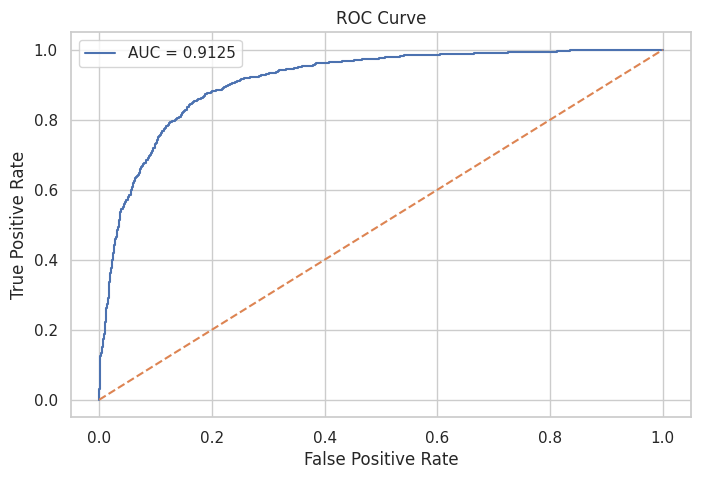


🔹 AUC Score: 0.912522575029092


In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = final_model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

print("\n🔹 AUC Score:", auc_score)


In [ ]:
final_model.save("best_ann_model.h5")
print("\nModel saved as best_ann_model.h5")



Model saved as best_ann_model.h5
